# Using simulations to understand linear regression estimator sampling distributions

In this example, we are going to use simulations to help us understand the probability distributions which underpin linear regression. We are going to do so using examples from time series.

Write a function which generates data as per an autoregressive process:

$X_t = \rho X_{t-1} + \epsilon_t,$

where $\epsilon_t \sim N(0, \sigma)$, $X_0=0$ and $t=1,...,T$.

In [24]:
import numpy as np
import scipy
import statsmodels.api as sm
from plotnine import *
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
def ar1(T, rho, sigma):
    X = [0]
    for t in range(1, T):
        X_t = np.random.normal(rho * X[t - 1], sigma, 1)[0]
        X.append(X_t)
    return np.array(X)

Using your function, generate an $\{X_t\}$ series with $\rho=0.5$, $T=100$ and $\sigma=0.5$. Plot this series.

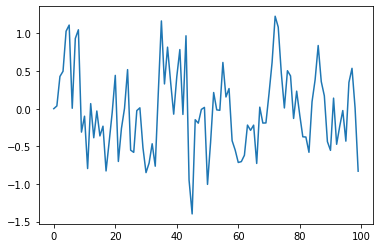

In [27]:
X = ar1(100, 0.5, 0.5)
plt.plot(X)
plt.show()

Suppose that $X_t$ relates to an output variable $Y_t$ via a linear relationship:

$Y_t = \alpha + \beta X_t + \nu_t$

where $\nu_t \sim N(0, \tau)$.

Write a function that can generate both an $\{X_t\}$ series following an autoregressive model and use the above relationship to generate a $\{Y_t\}$ series.

In [28]:
def linear_relationship(T, autoregressive_parameters, regression_parameters):
    rho = autoregressive_parameters['rho']
    sigma = autoregressive_parameters['sigma']
    X = ar1(T, rho, sigma)
    alpha = regression_parameters['alpha']
    beta = regression_parameters['beta']
    tau = regression_parameters['tau']
    Y = alpha + beta * X + np.random.normal(0, tau, T)
    return X, Y

In [31]:
autoregressive_parameters = {'rho': 0.5, 'sigma': 0.5}
regression_parameters = {'alpha': 0.0, 'beta': 1, 'tau': 1}
x, y = linear_relationship(100, autoregressive_parameters, regression_parameters)

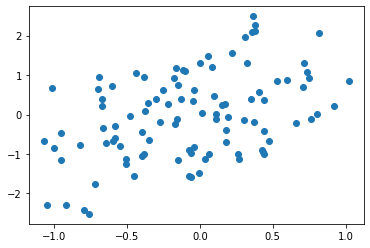

In [33]:
plt.scatter(x, y)
plt.show()

Write a function which generates series as per the above and performs a linear regression of $X_t$ on $Y_t$ and obtains the linear regression coefficient estimate and the standard error in the estimate. 

In [65]:
def linear_regression(T, autoregressive_parameters, regression_parameters):
    X, Y = linear_relationship(T, autoregressive_parameters, regression_parameters)
    X = sm.add_constant(X, prepend=False)
    model = sm.OLS(Y, X)
    fit = model.fit()
    coeff = fit.params[0]
    std = fit.bse[0]
    return coeff, std

In [70]:
coeff, std = linear_regression(100, autoregressive_parameters, regression_parameters)

Assuming, $\rho=0.5, \sigma= 0.5, \alpha=0.0, \beta=0.0, \tau=1$, use your above function to perform 1000 regressions with $T=100$ and plot the distribution of the beta estimates divided by the standard errors. (Note here, we are assuming that $X_t$ and $Y_t$ are independent.)

In [86]:
def linear_regression_replicate(niter, T, autoregressive_parameters, regression_parameters):
    betas = []
    stds = []
    for i in range(niter):
        beta, std = linear_regression(T, autoregressive_parameters, regression_parameters)
        betas.append(beta)
        stds.append(std)
    return betas, stds

In [92]:
autoregressive_parameters = {'rho': 0.5, 'sigma': 0.5}
regression_parameters = {'alpha': 0.0, 'beta': 0, 'tau': 1}
betas, stds = linear_regression_replicate(1000, 10, autoregressive_parameters, regression_parameters)

/usr/local/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 43'. Pick better value with 'binwidth'.


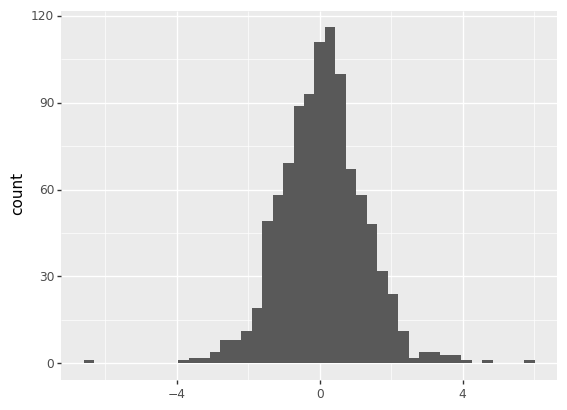

<ggplot: (345461133)>

In [93]:
ts = np.array(betas) / np.array(stds)
(qplot(ts))

In [84]:
autoregressive_parameters = {'rho': 0.5, 'sigma': 0.5}
regression_parameters = {'alpha': 0.0, 'beta': 1, 'tau': 1}
betas, stds = linear_regression_replicate(1000, 100, autoregressive_parameters, regression_parameters)

/usr/local/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 21'. Pick better value with 'binwidth'.


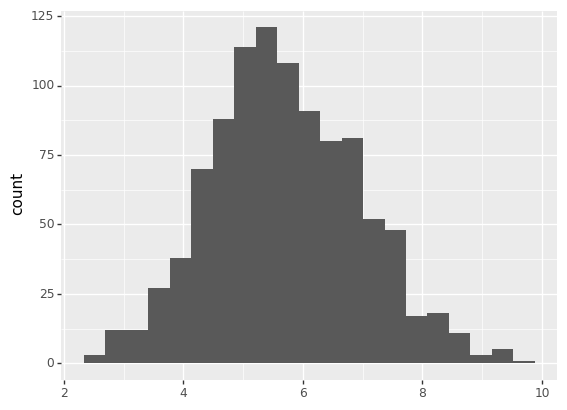

<ggplot: (346966673)>

In [85]:
(qplot(np.array(betas) / np.array(stds)))

Notes to self:

- add bit about linear regression uses the t statistic to carry out hypothesis tests about parameters: add a link to a video that explains this
- show that the distribution obtained above is the same as the theoretical
- show that when $\rho=1$, the distribution of t values when $\beta=1$ is larger than when $\beta=0$: in other words, the estimator is superconsistent